In [130]:
import pandas as pd
import json
from scipy import stats
from numpy.random import randn
import numpy as np
from matplotlib import pyplot

In [7]:
data = pd.read_csv('./results-7-31-2019-cleaned.csv')

In [8]:
with pd.option_context("display.max_rows", 100):
    display(data[['neighborhood', 'price']].groupby('neighborhood').median().sort_values(by=['price'], ascending=False))

,price
neighborhood,
Andersonville,1050000.0
Gold Coast,854500.0
Boystown,814500.0
Bucktown,750000.0
Sheffield & DePaul,742500.0
Wrigleyville,712500.0
Rush & Division,700000.0
Old Town,699900.0
Lincoln Park,697450.0


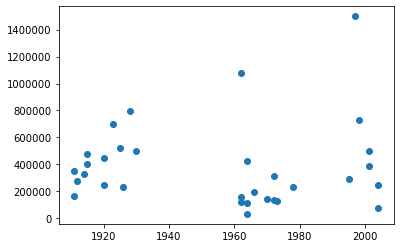

In [191]:
def remove_outliers(df, q=0.05):
    upper = df.quantile(1-q)
    lower = df.quantile(q)
    mask = (df < upper) & (df > lower)
    return mask

d = data[(data['neighborhood'] == 'Uptown') & (data['homeType'] == 'CONDO') & (data['beds'] == 2) & (data['baths'] == 2)]
mask = remove_outliers(d['price'], 0.1)
mask = remove_outliers(d['yearBuilt'], 0.1)
d = d[mask]
pyplot.scatter(d['yearBuilt'], d['price'])
pyplot.show()

In [128]:
lon = data['beds'].to_numpy()
#np.random.shuffle(lon)
price = data['price'].to_numpy()
#np.random.shuffle(price)
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=100,size=500)
test1 = lon[0:7000]
test2 = price[0:7000]
#np.random.shuffle(test1)
#np.random.shuffle(test2)
#print(test1)
#print(test2)
#print(test2/test1)
res = stats.spearmanr(rvs1, rvs2)
res

SpearmanrResult(correlation=-0.0375313501254005, pvalue=0.4023559170440286)